In [1]:
import numpy as np
from scipy import ndimage as ndi
from matplotlib import pyplot as plt
import matplotlib.cm as cm

from skimage import data
from skimage import color
from skimage.util import view_as_blocks

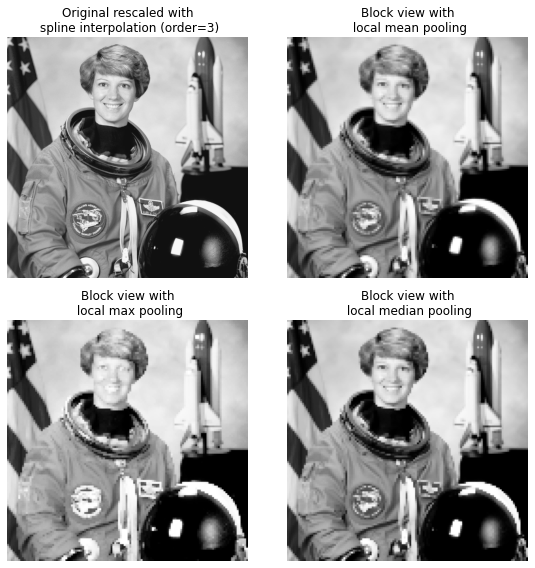

In [2]:
# get astronaut from skimage.data in grayscale
l = color.rgb2gray(data.astronaut())

# size of blocks
block_shape = (4, 4)

# see astronaut as a matrix of blocks (of shape block_shape)
view = view_as_blocks(l, block_shape)

# collapse the last two dimensions in one
flatten_view = view.reshape(view.shape[0], view.shape[1], -1)

# resampling the image by taking either the `mean`,
# the `max` or the `median` value of each blocks.
mean_view = np.mean(flatten_view, axis=2)
max_view = np.max(flatten_view, axis=2)
median_view = np.median(flatten_view, axis=2)

# display resampled images
fig, axes = plt.subplots(2, 2, figsize=(8, 8), sharex=True, sharey=True)
ax = axes.ravel()

l_resized = ndi.zoom(l, 2, order=3)
ax[0].set_title("Original rescaled with\n spline interpolation (order=3)")
ax[0].imshow(l_resized, extent=(-0.5, 128.5, 128.5, -0.5),
             cmap=cm.Greys_r)

ax[1].set_title("Block view with\n local mean pooling")
ax[1].imshow(mean_view, cmap=cm.Greys_r)

ax[2].set_title("Block view with\n local max pooling")
ax[2].imshow(max_view, cmap=cm.Greys_r)

ax[3].set_title("Block view with\n local median pooling")
ax[3].imshow(median_view, cmap=cm.Greys_r)

for a in ax:
    a.set_axis_off()

fig.tight_layout()
plt.show()